In [5]:
from functools import reduce
import cv2
import pandas as pd, numpy as np
import seaborn as sns
import torch
from sklearn.model_selection import KFold
import importlib
import sys
from semseg_functions import train_model_transunet, make_predictions_transunet, train_model, make_predictions 
importlib.reload(sys.modules["semseg_functions"])
from semseg_functions import train_model_transunet, make_predictions_transunet, train_model, make_predictions
from augment_train import augment_train
importlib.reload(sys.modules["augment_train"])
from augment_train import augment_train
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import time
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from torchvision import transforms
from transunet import TransUNet


urothelial_cells=pd.read_pickle("urothelial_cell_toy_data.pkl")
X = urothelial_cells["X"].numpy()  # (200, 3, 256, 256)
Y = urothelial_cells["y"]

# 1. Load pickle
sps = pd.read_pickle("specimens_toy_data.pkl")

df=pd.concat([sps[k]["metadata"].assign(class_=lambda x: k) for k in sps])
df["class_"]=pd.Categorical(df["class_"],["neg","aty","sus","pos"])

# 2. Resize all images to 256x256
resize = lambda x: cv2.resize(x, (256, 256), interpolation=cv2.INTER_CUBIC)
all_images = reduce(lambda x, y: x + y, [list(map(resize, sps[k]["imgs"])) for k in sps])  # List of resized numpy arrays

# 3. Convert to float tensor and normalize to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to (C, H, W) and scales to [0,1]
])

X_input = torch.stack([transform(img) for img in all_images])  # Shape: (N, 3, 256, 256)



In [ ]:
k_folds = 10  # 
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
open("training_log.txt", "w").close()

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold}/{k_folds} ---")

    X_tr, Y_tr = X[train_idx], Y[train_idx]
    X_val_fold, Y_val_fold = X[val_idx], Y[val_idx]

    # Convert to tensors
    X_tr = torch.FloatTensor(X_tr)
    Y_tr = torch.LongTensor(Y_tr)
    X_val_fold = torch.FloatTensor(X_val_fold)
    Y_val_fold = torch.LongTensor(Y_val_fold)

    X_tr_aug, Y_tr_aug = augment_train(X_tr, Y_tr, augment_times=2)

    start_time = time.time()
    model, best_loss = train_model_transunet(X_tr_aug, Y_tr_aug, X_val_fold, Y_val_fold,
                                             lr=0.003, momentum=0.9, weight_decay=0.01, fold_num=fold)
    elapsed = time.time() - start_time
    print(f"Fold {fold+1} training time: {elapsed:.2f}s, Best loss: {best_loss:.4f}")


--- Fold 0/10 ---


c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda


KeyboardInterrupt: 

In [ ]:
k_folds = 10  # 
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
open("training_log1.txt", "w").close()

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold}/{k_folds} ---")

    X_tr, Y_tr = X[train_idx], Y[train_idx]
    X_val_fold, Y_val_fold = X[val_idx], Y[val_idx]

    # Convert to tensors
    X_tr = torch.FloatTensor(X_tr)
    Y_tr = torch.LongTensor(Y_tr)
    X_val_fold = torch.FloatTensor(X_val_fold)
    Y_val_fold = torch.LongTensor(Y_val_fold)

    X_tr_aug, Y_tr_aug = augment_train(X_tr, Y_tr, augment_times=2)

    start_time = time.time()
    model=train_model(X_tr, Y_tr, X_val_fold, Y_val_fold, fold_num=fold)
    elapsed = time.time() - start_time
    print(f"Fold {fold+1} training time: {elapsed:.2f}s")


--- Fold 0/10 ---


c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.293
Val: Epoch 2, Loss: 0.462
Val: Epoch 3, Loss: 0.381
Val: Epoch 4, Loss: 0.499
Val: Epoch 5, Loss: 0.354
Val: Epoch 6, Loss: 0.345
Val: Epoch 7, Loss: 0.365
Val: Epoch 8, Loss: 0.569
Val: Epoch 9, Loss: 0.396
Val: Epoch 10, Loss: 0.357
Val: Epoch 11, Loss: 0.389
Val: Epoch 12, Loss: 0.573
Val: Epoch 13, Loss: 0.306
Val: Epoch 14, Loss: 0.297
Val: Epoch 15, Loss: 0.453
Val: Epoch 16, Loss: 0.387
Val: Epoch 17, Loss: 0.354
Val: Epoch 18, Loss: 0.284
Val: Epoch 19, Loss: 0.28
Val: Epoch 20, Loss: 0.422
Val: Epoch 21, Loss: 0.237
Val: Epoch 22, Loss: 0.298
Val: Epoch 23, Loss: 0.368
Val: Epoch 24, Loss: 0.258
Val: Epoch 25, Loss: 0.533
Val: Epoch 26, Loss: 0.28
Val: Epoch 27, Loss: 0.234
Val: Epoch 28, Loss: 0.263
Val: Epoch 29, Loss: 0.337
Val: Epoch 30, Loss: 0.256
Val: Epoch 31, Loss: 0.558
Val: Epoch 32, Loss: 0.269
Val: Epoch 33, Loss: 0.26
Val:

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.001
Val: Epoch 2, Loss: 0.423
Val: Epoch 3, Loss: 0.33
Val: Epoch 4, Loss: 0.342
Val: Epoch 5, Loss: 0.293
Val: Epoch 6, Loss: 0.368
Val: Epoch 7, Loss: 0.312
Val: Epoch 8, Loss: 0.309
Val: Epoch 9, Loss: 0.403
Val: Epoch 10, Loss: 0.331
Val: Epoch 11, Loss: 0.255
Val: Epoch 12, Loss: 0.284
Val: Epoch 13, Loss: 0.228
Val: Epoch 14, Loss: 0.254
Val: Epoch 15, Loss: 0.277
Val: Epoch 16, Loss: 0.254
Val: Epoch 17, Loss: 0.324
Val: Epoch 18, Loss: 0.257
Val: Epoch 19, Loss: 0.214
Val: Epoch 20, Loss: 0.32
Val: Epoch 21, Loss: 0.267
Val: Epoch 22, Loss: 0.278
Val: Epoch 23, Loss: 0.263
Val: Epoch 24, Loss: 0.259
Val: Epoch 25, Loss: 0.323
Val: Epoch 26, Loss: 0.336
Val: Epoch 27, Loss: 0.233
Val: Epoch 28, Loss: 0.288
Val: Epoch 29, Loss: 0.351
Val: Epoch 30, Loss: 0.283
Val: Epoch 31, Loss: 0.318
Val: Epoch 32, Loss: 0.336
Val: Epoch 33, Loss: 0.295
Val

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 0.886
Val: Epoch 2, Loss: 0.418
Val: Epoch 3, Loss: 0.291
Val: Epoch 4, Loss: 0.319
Val: Epoch 5, Loss: 0.314
Val: Epoch 6, Loss: 0.301
Val: Epoch 7, Loss: 0.43
Val: Epoch 8, Loss: 0.277
Val: Epoch 9, Loss: 0.259
Val: Epoch 10, Loss: 0.254
Val: Epoch 11, Loss: 0.255
Val: Epoch 12, Loss: 0.277
Val: Epoch 13, Loss: 0.421
Val: Epoch 14, Loss: 0.332
Val: Epoch 15, Loss: 0.235
Val: Epoch 16, Loss: 0.27
Val: Epoch 17, Loss: 0.225
Val: Epoch 18, Loss: 0.401
Val: Epoch 19, Loss: 0.273
Val: Epoch 20, Loss: 0.253
Val: Epoch 21, Loss: 0.283
Val: Epoch 22, Loss: 0.289
Val: Epoch 23, Loss: 0.256
Val: Epoch 24, Loss: 0.256
Val: Epoch 25, Loss: 0.241
Val: Epoch 26, Loss: 0.271
Val: Epoch 27, Loss: 0.298
Val: Epoch 28, Loss: 0.29
Val: Epoch 29, Loss: 0.263
Val: Epoch 30, Loss: 0.261
Val: Epoch 31, Loss: 0.287
Val: Epoch 32, Loss: 0.476
Val: Epoch 33, Loss: 0.281
Val:

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.006
Val: Epoch 2, Loss: 0.565
Val: Epoch 3, Loss: 0.31
Val: Epoch 4, Loss: 0.354
Val: Epoch 5, Loss: 0.288
Val: Epoch 6, Loss: 0.329
Val: Epoch 7, Loss: 0.369
Val: Epoch 8, Loss: 0.272
Val: Epoch 9, Loss: 0.345
Val: Epoch 10, Loss: 0.416
Val: Epoch 11, Loss: 0.323
Val: Epoch 12, Loss: 0.248
Val: Epoch 13, Loss: 0.34
Val: Epoch 14, Loss: 0.289
Val: Epoch 15, Loss: 0.323
Val: Epoch 16, Loss: 0.295
Val: Epoch 17, Loss: 0.275
Val: Epoch 18, Loss: 0.284
Val: Epoch 19, Loss: 0.306
Val: Epoch 20, Loss: 0.26
Val: Epoch 21, Loss: 0.268
Val: Epoch 22, Loss: 0.269
Val: Epoch 23, Loss: 0.338
Val: Epoch 24, Loss: 0.75
Val: Epoch 25, Loss: 0.302
Val: Epoch 26, Loss: 0.299
Val: Epoch 27, Loss: 0.405
Val: Epoch 28, Loss: 0.455
Val: Epoch 29, Loss: 0.311
Val: Epoch 30, Loss: 0.324
Val: Epoch 31, Loss: 0.316
Val: Epoch 32, Loss: 0.305
Val: Epoch 33, Loss: 0.291
Val: 

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 0.924
Val: Epoch 2, Loss: 0.443
Val: Epoch 3, Loss: 0.337
Val: Epoch 4, Loss: 0.278
Val: Epoch 5, Loss: 0.27
Val: Epoch 6, Loss: 0.264
Val: Epoch 7, Loss: 0.295
Val: Epoch 8, Loss: 0.301
Val: Epoch 9, Loss: 0.352
Val: Epoch 10, Loss: 0.277
Val: Epoch 11, Loss: 0.278
Val: Epoch 12, Loss: 0.284
Val: Epoch 13, Loss: 0.29
Val: Epoch 14, Loss: 0.42
Val: Epoch 15, Loss: 0.28
Val: Epoch 16, Loss: 0.253
Val: Epoch 17, Loss: 0.335
Val: Epoch 18, Loss: 0.285
Val: Epoch 19, Loss: 0.265
Val: Epoch 20, Loss: 0.318
Val: Epoch 21, Loss: 0.345
Val: Epoch 22, Loss: 0.257
Val: Epoch 23, Loss: 0.274
Val: Epoch 24, Loss: 0.285
Val: Epoch 25, Loss: 0.282
Val: Epoch 26, Loss: 0.392
Val: Epoch 27, Loss: 0.355
Val: Epoch 28, Loss: 0.358
Val: Epoch 29, Loss: 0.662
Val: Epoch 30, Loss: 0.284
Val: Epoch 31, Loss: 0.503
Val: Epoch 32, Loss: 0.309
Val: Epoch 33, Loss: 0.338
Val: 

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.216
Val: Epoch 2, Loss: 0.452
Val: Epoch 3, Loss: 0.349
Val: Epoch 4, Loss: 0.33
Val: Epoch 5, Loss: 0.339
Val: Epoch 6, Loss: 0.288
Val: Epoch 7, Loss: 0.269
Val: Epoch 8, Loss: 0.292
Val: Epoch 9, Loss: 0.316
Val: Epoch 10, Loss: 0.304
Val: Epoch 11, Loss: 0.368
Val: Epoch 12, Loss: 0.271
Val: Epoch 13, Loss: 0.336
Val: Epoch 14, Loss: 0.384
Val: Epoch 15, Loss: 0.272
Val: Epoch 16, Loss: 0.475
Val: Epoch 17, Loss: 0.342
Val: Epoch 18, Loss: 0.327
Val: Epoch 19, Loss: 0.324
Val: Epoch 20, Loss: 0.351
Val: Epoch 21, Loss: 0.324
Val: Epoch 22, Loss: 0.417
Val: Epoch 23, Loss: 0.326
Val: Epoch 24, Loss: 0.327
Val: Epoch 25, Loss: 0.351
Val: Epoch 26, Loss: 0.284
Val: Epoch 27, Loss: 0.354
Val: Epoch 28, Loss: 0.361
Val: Epoch 29, Loss: 0.438
Val: Epoch 30, Loss: 0.407
Val: Epoch 31, Loss: 0.372
Val: Epoch 32, Loss: 0.394
Val: Epoch 33, Loss: 0.43
Val

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.237
Val: Epoch 2, Loss: 0.425
Val: Epoch 3, Loss: 0.355
Val: Epoch 4, Loss: 0.417
Val: Epoch 5, Loss: 0.316
Val: Epoch 6, Loss: 0.363
Val: Epoch 7, Loss: 0.329
Val: Epoch 8, Loss: 0.379
Val: Epoch 9, Loss: 0.435
Val: Epoch 10, Loss: 0.29
Val: Epoch 11, Loss: 0.391
Val: Epoch 12, Loss: 0.429
Val: Epoch 13, Loss: 0.401
Val: Epoch 14, Loss: 0.404
Val: Epoch 15, Loss: 0.714
Val: Epoch 16, Loss: 0.387
Val: Epoch 17, Loss: 0.347
Val: Epoch 18, Loss: 0.351
Val: Epoch 19, Loss: 0.322
Val: Epoch 20, Loss: 0.353
Val: Epoch 21, Loss: 0.791
Val: Epoch 22, Loss: 0.363
Val: Epoch 23, Loss: 0.354
Val: Epoch 24, Loss: 0.414
Val: Epoch 25, Loss: 0.414
Val: Epoch 26, Loss: 0.423
Val: Epoch 27, Loss: 0.397
Val: Epoch 28, Loss: 0.412
Val: Epoch 29, Loss: 0.455
Val: Epoch 30, Loss: 0.401
Val: Epoch 31, Loss: 0.412
Val: Epoch 32, Loss: 0.393
Val: Epoch 33, Loss: 0.41
Val

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.159
Val: Epoch 2, Loss: 0.476
Val: Epoch 3, Loss: 0.348
Val: Epoch 4, Loss: 0.414
Val: Epoch 5, Loss: 0.381
Val: Epoch 6, Loss: 0.319
Val: Epoch 7, Loss: 0.288
Val: Epoch 8, Loss: 0.436
Val: Epoch 9, Loss: 0.375
Val: Epoch 10, Loss: 0.311
Val: Epoch 11, Loss: 0.438
Val: Epoch 12, Loss: 0.415
Val: Epoch 13, Loss: 0.296
Val: Epoch 14, Loss: 0.324
Val: Epoch 15, Loss: 0.331
Val: Epoch 16, Loss: 0.347
Val: Epoch 17, Loss: 0.378
Val: Epoch 18, Loss: 0.406
Val: Epoch 19, Loss: 0.343
Val: Epoch 20, Loss: 0.383
Val: Epoch 21, Loss: 0.325
Val: Epoch 22, Loss: 0.352
Val: Epoch 23, Loss: 0.36
Val: Epoch 24, Loss: 0.361
Val: Epoch 25, Loss: 0.339
Val: Epoch 26, Loss: 0.361
Val: Epoch 27, Loss: 0.363
Val: Epoch 28, Loss: 0.476
Val: Epoch 29, Loss: 0.379
Val: Epoch 30, Loss: 0.402
Val: Epoch 31, Loss: 0.412
Val: Epoch 32, Loss: 0.371
Val: Epoch 33, Loss: 0.411
Va

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 1.076
Val: Epoch 2, Loss: 0.411
Val: Epoch 3, Loss: 0.348
Val: Epoch 4, Loss: 0.366
Val: Epoch 5, Loss: 0.295
Val: Epoch 6, Loss: 0.33
Val: Epoch 7, Loss: 0.346
Val: Epoch 8, Loss: 0.277
Val: Epoch 9, Loss: 0.73
Val: Epoch 10, Loss: 0.265
Val: Epoch 11, Loss: 0.265
Val: Epoch 12, Loss: 0.359
Val: Epoch 13, Loss: 0.32
Val: Epoch 14, Loss: 0.261
Val: Epoch 15, Loss: 0.307
Val: Epoch 16, Loss: 0.277
Val: Epoch 17, Loss: 0.272
Val: Epoch 18, Loss: 0.318
Val: Epoch 19, Loss: 0.312
Val: Epoch 20, Loss: 0.423
Val: Epoch 21, Loss: 0.302
Val: Epoch 22, Loss: 0.245
Val: Epoch 23, Loss: 0.24
Val: Epoch 24, Loss: 0.322
Val: Epoch 25, Loss: 0.249
Val: Epoch 26, Loss: 0.265
Val: Epoch 27, Loss: 0.271
Val: Epoch 28, Loss: 0.234
Val: Epoch 29, Loss: 0.244
Val: Epoch 30, Loss: 0.282
Val: Epoch 31, Loss: 0.281
Val: Epoch 32, Loss: 0.283
Val: Epoch 33, Loss: 0.274
Val: 

c:\Python312\Lib\site-packages\torch\nn\functional.py:4969: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Python312\Lib\site-packages\torch\nn\functional.py:4902: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Augmented X shape: torch.Size([540, 3, 256, 256]), Augmented Y shape: torch.Size([540, 256, 256])
Using device: cuda
Val: Epoch 1, Loss: 0.87
Val: Epoch 2, Loss: 0.381
Val: Epoch 3, Loss: 0.258
Val: Epoch 4, Loss: 0.246
Val: Epoch 5, Loss: 0.242
Val: Epoch 6, Loss: 0.318
Val: Epoch 7, Loss: 0.284
Val: Epoch 8, Loss: 0.23
Val: Epoch 9, Loss: 0.203
Val: Epoch 10, Loss: 0.215
Val: Epoch 11, Loss: 0.276
Val: Epoch 12, Loss: 0.312
Val: Epoch 13, Loss: 0.652
Val: Epoch 14, Loss: 0.263
Val: Epoch 15, Loss: 0.481
Val: Epoch 16, Loss: 0.263
Val: Epoch 17, Loss: 0.217
Val: Epoch 18, Loss: 0.275
Val: Epoch 19, Loss: 0.258
Val: Epoch 20, Loss: 0.346
Val: Epoch 21, Loss: 0.219
Val: Epoch 22, Loss: 0.251
Val: Epoch 23, Loss: 0.22
Val: Epoch 24, Loss: 0.221
Val: Epoch 25, Loss: 0.265
Val: Epoch 26, Loss: 0.221
Val: Epoch 27, Loss: 0.206
Val: Epoch 28, Loss: 0.413
Val: Epoch 29, Loss: 0.239
Val: Epoch 30, Loss: 0.226
Val: Epoch 31, Loss: 0.292
Val: Epoch 32, Loss: 0.211
Val: Epoch 33, Loss: 0.239
Val:


--- Fold 0/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    473629
           1       0.96      0.87      0.92    641365
           2       0.77      0.93      0.84    195726

    accuracy                           0.92   1310720
   macro avg       0.89      0.93      0.91   1310720
weighted avg       0.93      0.92      0.92   1310720


--- Fold 1/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    463406
           1       0.95      0.86      0.90    546077
           2       0.85      0.94      0.89    301237

    accuracy                           0.92   1310720
   macro avg       0.91      0.93      0.92   1310720
weighted avg       0.93      0.92      0.92   1310720


--- Fold 2/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    464183
           1       0.93      0.90      0.91    602532
           2       0.82      0.90      0.86    244005

    accuracy                           0.92   1310720
   macro avg       0.91      0.92      0.91   1310720
weighted avg       0.92      0.92      0.92   1310720


--- Fold 3/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    464692
           1       0.93      0.85      0.89    582196
           2       0.78      0.90      0.83    263832

    accuracy                           0.91   1310720
   macro avg       0.89      0.91      0.90   1310720
weighted avg       0.91      0.91      0.91   1310720


--- Fold 4/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    420472
           1       0.93      0.88      0.90    568194
           2       0.84      0.90      0.87    322054

    accuracy                           0.92   1310720
   macro avg       0.91      0.92      0.91   1310720
weighted avg       0.92      0.92      0.92   1310720


--- Fold 5/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    458668
           1       0.89      0.86      0.87    587923
           2       0.76      0.80      0.78    264129

    accuracy                           0.89   1310720
   macro avg       0.87      0.88      0.87   1310720
weighted avg       0.89      0.89      0.89   1310720


--- Fold 6/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    492319
           1       0.91      0.88      0.90    633887
           2       0.71      0.81      0.76    184514

    accuracy                           0.90   1310720
   macro avg       0.86      0.88      0.87   1310720
weighted avg       0.91      0.90      0.90   1310720


--- Fold 7/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    501552
           1       0.89      0.86      0.88    543894
           2       0.78      0.86      0.82    265274

    accuracy                           0.90   1310720
   macro avg       0.88      0.89      0.89   1310720
weighted avg       0.90      0.90      0.90   1310720


--- Fold 8/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    459139
           1       0.94      0.88      0.91    601717
           2       0.80      0.93      0.86    249864

    accuracy                           0.92   1310720
   macro avg       0.91      0.93      0.91   1310720
weighted avg       0.93      0.92      0.92   1310720


--- Fold 9/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3210018642.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/best_transu

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    516900
           1       0.95      0.84      0.89    515935
           2       0.81      0.95      0.87    277885

    accuracy                           0.92   1310720
   macro avg       0.91      0.92      0.91   1310720
weighted avg       0.92      0.92      0.92   1310720



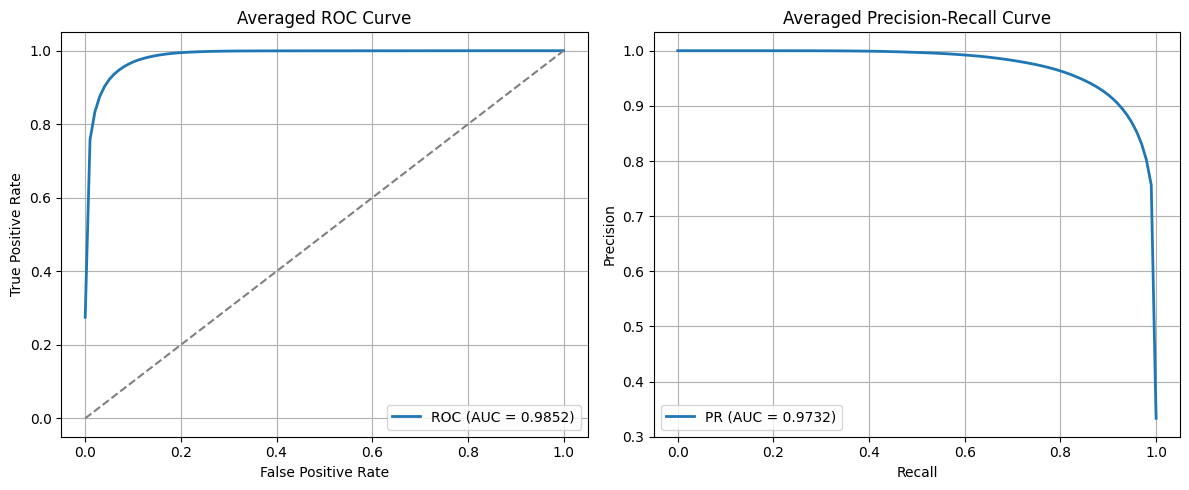


Average Accuracy across 10 folds: 0.9116


In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import torch

k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# ROC and PR containers
all_fpr = []
all_tpr = []
all_precision = []
all_recall = []
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold}/{k_folds} ---")
    X_tr, Y_tr = X[train_idx], Y[train_idx]
    X_val_fold, Y_val_fold = X[val_idx], Y[val_idx]

    # tensors
    X_val_fold = torch.FloatTensor(X_val_fold)
    Y_val_fold = torch.LongTensor(Y_val_fold)

    model0 = TransUNet(in_channels=3, classes=3)
    model0.load_state_dict(torch.load(f"./seg_models/best_transunet_model_fold{fold}.pkl", map_location="cpu"))

    y_val_pred = make_predictions_transunet(X_val_fold, model=model0)
    y_val_pred_lbls = y_val_pred.argmax(1)
    
    y_true_flat = Y_val_fold.numpy().flatten()
    y_pred_flat = y_val_pred_lbls.flatten()
    
    print(classification_report(y_true_flat, y_pred_flat))

    # Store accuracy
    acc = accuracy_score(y_true_flat, y_pred_flat)
    fold_accuracies.append(acc)

    # Flatten for ROC/PR
    y_val_pred_flat = y_val_pred.transpose(0, 2, 3, 1).reshape(-1, y_val_pred.shape[1])
    y_true_bin = label_binarize(y_true_flat, classes=[0, 1, 2])

    # ROC
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_val_pred_flat.ravel())
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    # PR
    precision, recall, _ = precision_recall_curve(y_true_bin.ravel(), y_val_pred_flat.ravel())
    all_precision.append(precision)
    all_recall.append(recall)

# Average ROC
mean_fpr_tunet = np.linspace(0, 1, 100)
mean_tpr_tunet = np.zeros_like(mean_fpr_tunet)
for fpr, tpr in zip(all_fpr, all_tpr):
    mean_tpr_tunet += np.interp(mean_fpr_tunet, fpr, tpr)
mean_tpr_tunet /= len(all_fpr)
mean_roc_auc_tunet = auc(mean_fpr_tunet, mean_tpr_tunet)

# Average PR
mean_recall_tunet = np.linspace(0, 1, 100)
mean_precision_tunet = np.zeros_like(mean_recall_tunet)
for precision, recall in zip(all_precision, all_recall):
    mean_precision_tunet += np.interp(mean_recall_tunet, recall[::-1], precision[::-1])
mean_precision_tunet /= len(all_precision)
mean_pr_auc_tunet = auc(mean_recall_tunet, mean_precision_tunet)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mean_fpr_tunet, mean_tpr_tunet, lw=2, label=f'ROC (AUC = {mean_roc_auc_tunet:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Averaged ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mean_recall_tunet, mean_precision_tunet, lw=2, label=f'PR (AUC = {mean_pr_auc_tunet:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Averaged Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print average accuracy
avg_acc = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across {k_folds} folds: {avg_acc:.4f}")



--- Fold 1/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    473629
           1       0.94      0.89      0.91    641365
           2       0.76      0.87      0.81    195726

    accuracy                           0.91   1310720
   macro avg       0.89      0.91      0.90   1310720
weighted avg       0.92      0.91      0.92   1310720


--- Fold 2/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    463406
           1       0.93      0.84      0.88    546077
           2       0.82      0.91      0.86    301237

    accuracy                           0.91   1310720
   macro avg       0.90      0.91      0.90   1310720
weighted avg       0.91      0.91      0.91   1310720


--- Fold 3/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    464183
           1       0.92      0.90      0.91    602532
           2       0.84      0.87      0.85    244005

    accuracy                           0.92   1310720
   macro avg       0.91      0.91      0.91   1310720
weighted avg       0.92      0.92      0.92   1310720


--- Fold 4/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    464692
           1       0.93      0.83      0.88    582196
           2       0.76      0.89      0.82    263832

    accuracy                           0.90   1310720
   macro avg       0.88      0.90      0.89   1310720
weighted avg       0.90      0.90      0.90   1310720


--- Fold 5/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    420472
           1       0.93      0.82      0.87    568194
           2       0.81      0.91      0.85    322054

    accuracy                           0.89   1310720
   macro avg       0.89      0.90      0.89   1310720
weighted avg       0.90      0.89      0.89   1310720


--- Fold 6/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    458668
           1       0.92      0.85      0.88    587923
           2       0.76      0.87      0.81    264129

    accuracy                           0.90   1310720
   macro avg       0.88      0.90      0.89   1310720
weighted avg       0.90      0.90      0.90   1310720


--- Fold 7/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    492319
           1       0.89      0.92      0.90    633887
           2       0.80      0.70      0.75    184514

    accuracy                           0.91   1310720
   macro avg       0.88      0.86      0.87   1310720
weighted avg       0.90      0.91      0.90   1310720


--- Fold 8/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    501552
           1       0.93      0.72      0.81    543894
           2       0.69      0.91      0.78    265274

    accuracy                           0.86   1310720
   macro avg       0.85      0.87      0.85   1310720
weighted avg       0.88      0.86      0.86   1310720


--- Fold 9/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    459139
           1       0.94      0.83      0.89    601717
           2       0.74      0.91      0.82    249864

    accuracy                           0.90   1310720
   macro avg       0.88      0.91      0.89   1310720
weighted avg       0.91      0.90      0.90   1310720


--- Fold 10/10 ---


C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\3698573915.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model0.load_state_dict(torch.load(f"./seg_models/bestunet_mo

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    516900
           1       0.92      0.84      0.88    515935
           2       0.81      0.90      0.85    277885

    accuracy                           0.91   1310720
   macro avg       0.90      0.91      0.90   1310720
weighted avg       0.91      0.91      0.91   1310720



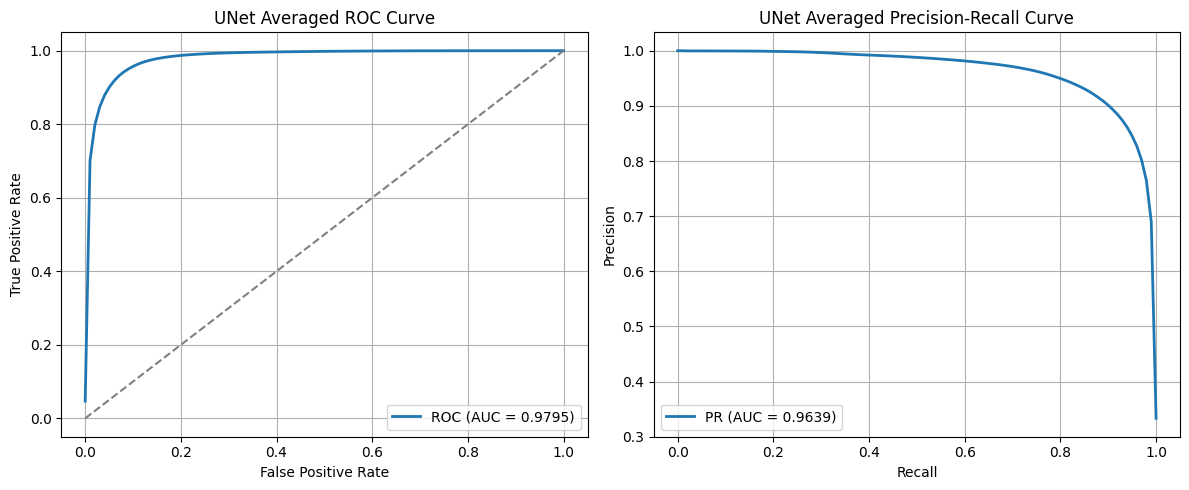


Average Accuracy across 10 folds: 0.9008


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import segmentation_models_pytorch as smp
import torch

k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Containers for ROC, PR, and Accuracy
all_fpr = []
all_tpr = []
all_precision = []
all_recall = []
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold + 1}/{k_folds} ---")

    X_tr, Y_tr = X[train_idx], Y[train_idx]
    X_val_fold, Y_val_fold = X[val_idx], Y[val_idx]

    # Convert to tensors
    X_val_fold = torch.FloatTensor(X_val_fold)
    Y_val_fold = torch.LongTensor(Y_val_fold)

    # Load model
    model0 = dict(unet=smp.Unet, fpn=smp.FPN).get("unet", smp.Unet)
    model0 = model0(classes=3, in_channels=3, encoder_name="resnet18", encoder_weights=None)
    model0.load_state_dict(torch.load(f"./seg_models/bestunet_model_fold{fold}.pkl", map_location="cpu"))

    # Predict
    y_val_pred = make_predictions_transunet(X_val_fold, model=model0)
    y_val_pred_lbls = y_val_pred.argmax(1)

    # Accuracy tracking
    y_true_flat = Y_val_fold.numpy().flatten()
    y_pred_flat = y_val_pred_lbls.flatten()
    acc = accuracy_score(y_true_flat, y_pred_flat)
    fold_accuracies.append(acc)

    print(classification_report(y_true_flat, y_pred_flat))

    # Flatten prediction: shape (B, C, H, W) to  (N, C)
    y_val_pred_flat = y_val_pred.transpose(0, 2, 3, 1).reshape(-1, y_val_pred.shape[1])
    y_true_binarized = label_binarize(y_true_flat, classes=[0, 1, 2])

    # ROC
    fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_val_pred_flat.ravel())
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    # PR
    precision, recall, _ = precision_recall_curve(y_true_binarized.ravel(), y_val_pred_flat.ravel())
    all_precision.append(precision)
    all_recall.append(recall)

#  Average ROC
mean_fpr_unet = np.linspace(0, 1, 100)
mean_tpr_unet = np.zeros_like(mean_fpr_unet)
for fpr, tpr in zip(all_fpr, all_tpr):
    mean_tpr_unet += np.interp(mean_fpr_unet, fpr, tpr)
mean_tpr_unet /= len(all_fpr)
mean_roc_auc_unet = auc(mean_fpr_unet, mean_tpr_unet)

#  Average PR 
mean_recall_unet = np.linspace(0, 1, 100)
mean_precision_unet = np.zeros_like(mean_recall_unet)
for precision, recall in zip(all_precision, all_recall):
    mean_precision_unet += np.interp(mean_recall_unet, recall[::-1], precision[::-1])
mean_precision_unet /= len(all_precision)
mean_pr_auc_unet = auc(mean_recall_unet, mean_precision_unet)

#  Plot 
plt.figure(figsize=(12, 5))

# ROC subplot
plt.subplot(1, 2, 1)
plt.plot(mean_fpr_unet, mean_tpr_unet, lw=2, label=f'ROC (AUC = {mean_roc_auc_unet:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('UNet Averaged ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# PR subplot
plt.subplot(1, 2, 2)
plt.plot(mean_recall_unet, mean_precision_unet, lw=2, label=f'PR (AUC = {mean_pr_auc_unet:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('UNet Averaged Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print average accuracy 
avg_acc = np.mean(fold_accuracies)
print(f"\nAverage Accuracy across {k_folds} folds: {avg_acc:.4f}")



--- Fold 1/10 ---

--- Fold 2/10 ---

--- Fold 3/10 ---

--- Fold 4/10 ---

--- Fold 5/10 ---

--- Fold 6/10 ---

--- Fold 7/10 ---

--- Fold 8/10 ---

--- Fold 9/10 ---

--- Fold 10/10 ---

=== Pixelwise Classification Report ===
              precision    recall  f1-score   support

  Background       0.99      0.95      0.97   4714960
   Cytoplasm       0.68      0.01      0.02   5823720
     Nucleus       0.30      1.00      0.46   2568520

    accuracy                           0.54  13107200
   macro avg       0.66      0.65      0.49  13107200
weighted avg       0.72      0.54      0.45  13107200



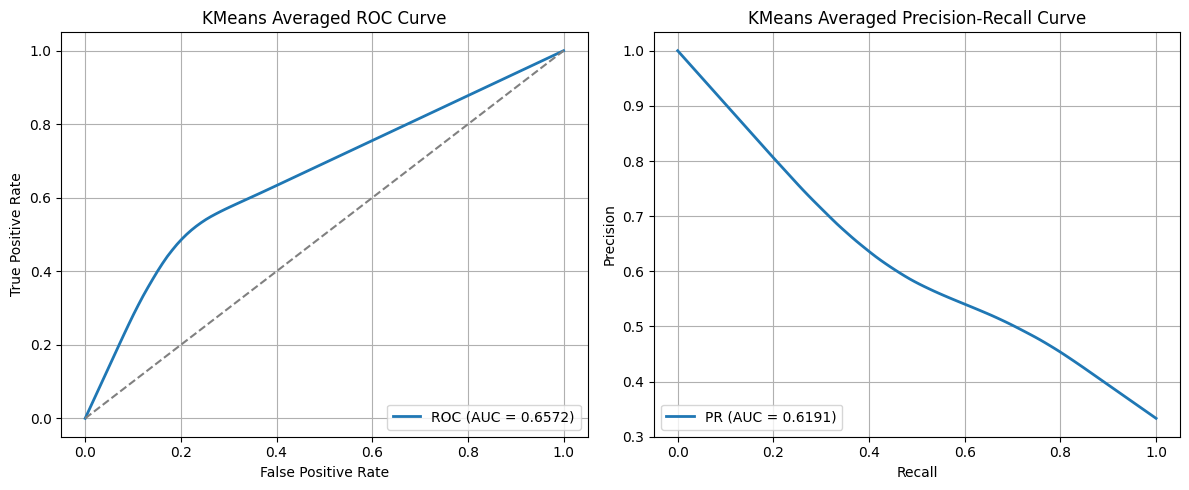

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
from skimage.color import rgb2gray
import pandas as pd

# Transpose to (N, H, W, 3) for RGB 
X_rgb = np.transpose(X, (0, 2, 3, 1)).astype(np.uint8)

# K-Fold
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Storage
all_y_true = []
all_y_pred = []
all_fpr = []
all_tpr = []
all_precision = []
all_recall = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_rgb)):
    print(f"\n--- Fold {fold + 1}/{k_folds} ---")
    X_val_fold = X_rgb[val_idx]
    Y_val_fold = Y[val_idx]

    for img_rgb, label in zip(X_val_fold, Y_val_fold):
        img_gray = rgb2gray(img_rgb)
        pixels = img_rgb.reshape(-1, 3).astype(np.float32)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(pixels).reshape(img_gray.shape)

        # Sort clusters by grayintensity
        cluster_means = [img_gray[labels == i].mean() for i in range(3)]
        cluster_order = np.argsort(cluster_means)

        #clusters to class
        label_map = np.zeros_like(labels, dtype=np.uint8)
        label_map[labels == cluster_order[0]] = 2  # Nucls
        label_map[labels == cluster_order[1]] = 1  # Cyto
        label_map[labels == cluster_order[2]] = 0  # Backgr

        all_y_true.append(label.flatten())
        all_y_pred.append(label_map.flatten())

        y_true_bin = label_binarize(label.flatten(), classes=[0, 1, 2])
        y_pred_bin = label_binarize(label_map.flatten(), classes=[0, 1, 2])

        fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
        precision, recall, _ = precision_recall_curve(y_true_bin.ravel(), y_pred_bin.ravel())

        all_fpr.append(fpr)
        all_tpr.append(tpr)
        all_precision.append(precision)
        all_recall.append(recall)

# Flatten true/pred for full report
y_true_flat = np.concatenate(all_y_true)
y_pred_flat = np.concatenate(all_y_pred)

print("\n=== Pixelwise Classification Report ===")
print(classification_report(y_true_flat, y_pred_flat, labels=[0, 1, 2],
                            target_names=["Background", "Cytoplasm", "Nucleus"]))

# Average ROC
mean_fpr_km = np.linspace(0, 1, 100)
mean_tpr_km = np.zeros_like(mean_fpr_km)

for fpr, tpr in zip(all_fpr, all_tpr):
    mean_tpr_km += np.interp(mean_fpr_km, fpr, tpr)
mean_tpr_km /= len(all_fpr)
mean_roc_auc_km = auc(mean_fpr_km, mean_tpr_km)

#Average PR 
mean_recall_km = np.linspace(0, 1, 100)
mean_precision_km = np.zeros_like(mean_recall_km)

for precision, recall in zip(all_precision, all_recall):
    mean_precision_km += np.interp(mean_recall_km, recall[::-1], precision[::-1])
mean_precision_km /= len(all_precision)
mean_pr_auc_km = auc(mean_recall_km, mean_precision_km)

#Plot 
plt.figure(figsize=(12, 5))

# ROC subplot
plt.subplot(1, 2, 1)
plt.plot(mean_fpr_km, mean_tpr_km, lw=2, label=f'ROC (AUC = {mean_roc_auc_km:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KMeans Averaged ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# PR subplot
plt.subplot(1, 2, 2)
plt.plot(mean_recall_km, mean_precision_km, lw=2, label=f'PR (AUC = {mean_pr_auc_km:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KMeans Averaged Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()



--- Fold 1/10 ---
Saved thresholds to threshold_models\fold_0_thresholds.pkl: [0.368241539840548, 0.9571551589530466]
Best thresholds: [0.368241539840548, 0.9571551589530466]

--- Fold 2/10 ---
Saved thresholds to threshold_models\fold_1_thresholds.pkl: [0.368241539840548, 0.9571551589530466]
Best thresholds: [0.368241539840548, 0.9571551589530466]

--- Fold 3/10 ---
Saved thresholds to threshold_models\fold_2_thresholds.pkl: [0.368241539840548, 0.9571551589530466]
Best thresholds: [0.368241539840548, 0.9571551589530466]

--- Fold 4/10 ---
Saved thresholds to threshold_models\fold_3_thresholds.pkl: [0.368241539840548, 0.9571551589530466]
Best thresholds: [0.368241539840548, 0.9571551589530466]

--- Fold 5/10 ---
Saved thresholds to threshold_models\fold_4_thresholds.pkl: [0.368241539840548, 0.9571551589530466]
Best thresholds: [0.368241539840548, 0.9571551589530466]

--- Fold 6/10 ---
Saved thresholds to threshold_models\fold_5_thresholds.pkl: [0.368241539840548, 0.9571551589530466]
B

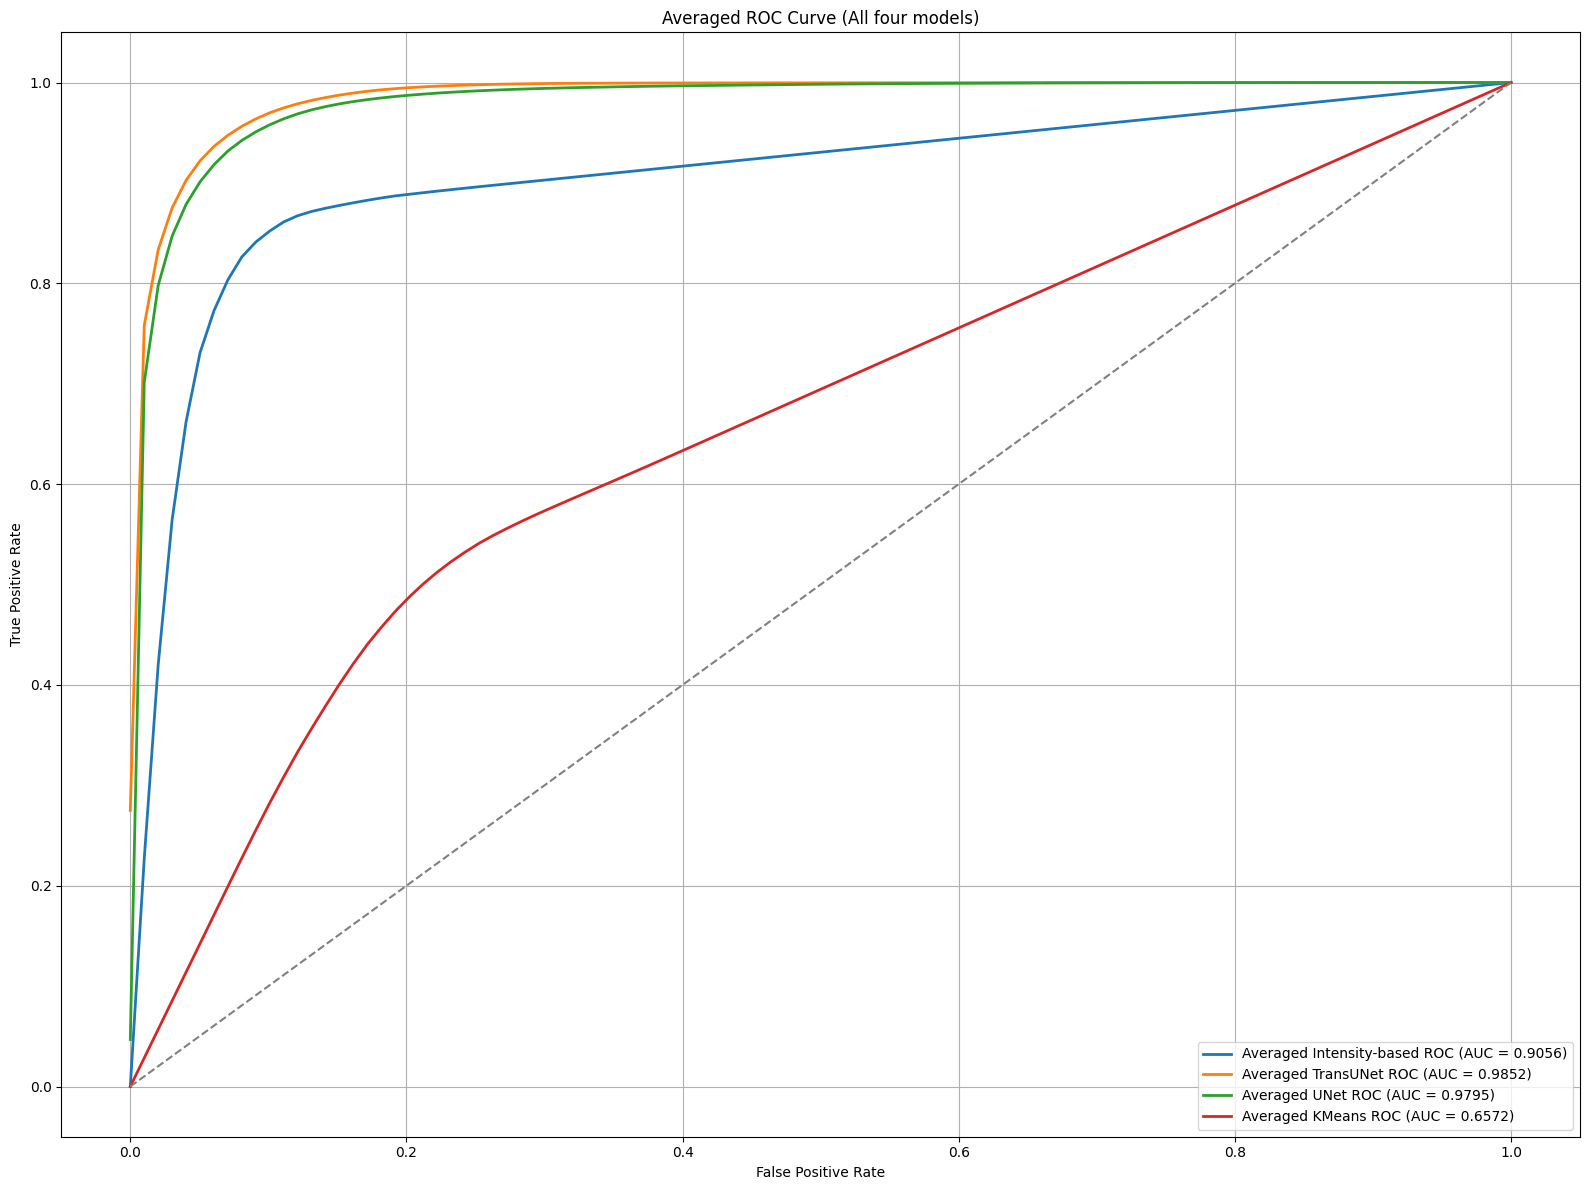

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from skimage.color import rgb2gray
from skimage.morphology import binary_opening, binary_closing, disk
from skopt import gp_minimize
from skopt.space import Real
import os
import pickle
from pathlib import Path

save_dir = "threshold_models"
os.makedirs(save_dir, exist_ok=True)

# Load data
urothelial_cells = pd.read_pickle("urothelial_cell_toy_data.pkl")
X = np.transpose(urothelial_cells["X"].numpy() * 255, (0, 2, 3, 1)).astype(np.uint8)
Y = urothelial_cells["y"]

# Postprocessing
def postprocess_mask(mask):
    mask = binary_opening(mask, disk(5))
    mask = binary_closing(mask, disk(8))
    return mask

# Intensity-based pixel classifier
def get_pixelwise_labels(img_gray, nucleus_threshold=0.4, cytoplasm_threshold=0.6):
    nucleus_mask = img_gray <= nucleus_threshold
    nucleus_mask = postprocess_mask(nucleus_mask)

    cytoplasm_mask = img_gray <= cytoplasm_threshold
    cytoplasm_mask = postprocess_mask(cytoplasm_mask)
    cytoplasm_mask = np.logical_and(cytoplasm_mask, ~nucleus_mask)

    background_mask = img_gray > cytoplasm_threshold
    background_mask = postprocess_mask(background_mask)

    label_map = np.zeros_like(img_gray, dtype=np.uint8)
    label_map[nucleus_mask] = 2
    label_map[cytoplasm_mask] = 1
    label_map[background_mask] = 0
    return label_map

# Optimization loss
def loss_func_pixels(thresholds, X_train_gray, Y_train):
    thresholds = sorted(thresholds)
    y_true = Y_train.reshape(-1)
    y_pred = np.array([
        get_pixelwise_labels(img, *thresholds).reshape(-1)
        for img in X_train_gray
    ]).reshape(-1)
    from sklearn.metrics import f1_score
    return -f1_score(y_true, y_pred, average='macro')

#ROC containers
all_fpr = []
all_tpr = []
all_y_true = []
all_y_pred = []

# CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    if fold <11:
        print(f"\n--- Fold {fold + 1}/10 ---")
        X_train, X_val = X[train_idx], X[val_idx]
        Y_train, Y_val = Y[train_idx], Y[val_idx]

        # Grayscale 
        X_train_gray = np.vectorize(rgb2gray, signature='(w,h,3)->(w,h)')(X_train.astype(float) / 255.)
        X_val_gray = np.vectorize(rgb2gray, signature='(w,h,3)->(w,h)')(X_val.astype(float) / 255.)

        threshold_file = Path(save_dir) / f"fold_{fold}_thresholds.pkl"

        if threshold_file.exists():
            with open(threshold_file, "rb") as f:
                thresholds = pickle.load(f)
            print(f"Loaded thresholds from {threshold_file}: {thresholds}")
        else:   
            # Optimize thresholds
            space = [Real(0, 1, name='threshold1'), Real(0, 1, name='threshold2')]
            res = gp_minimize(lambda x: loss_func_pixels(x, X_train_gray, Y_train),
                            space, x0=(0.4, 0.6), n_calls=40, random_state=0, n_jobs=-1, verbose=False)
            thresholds = sorted(res.x)
            with open(threshold_file, "wb") as f:
                pickle.dump(thresholds, f)
                print(f"Saved thresholds to {threshold_file}: {thresholds}")
            print(f"Best thresholds: {thresholds}")

        # Predict on validation set
        for img_gray, label in zip(X_val_gray, Y_val):
            pred = get_pixelwise_labels(img_gray, *thresholds)
            all_y_true.append(label.flatten())
            all_y_pred.append(pred.flatten())

            # Binarize for ROC
            y_true_bin = label_binarize(label.flatten(), classes=[0, 1, 2])
            y_pred_bin = label_binarize(pred.flatten(), classes=[0, 1, 2])
            fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
            all_fpr.append(fpr)
            all_tpr.append(tpr)
        

# Final report
y_true_flat = np.concatenate(all_y_true)
y_pred_flat = np.concatenate(all_y_pred)

print("\n=== Pixelwise Classification Report (Intensity Thresholding) ===")
print(classification_report(y_true_flat, y_pred_flat, labels=[0, 1, 2],
                            target_names=["Background", "Cytoplasm", "Nucleus"]))

# Compute average ROC
mean_fpr_inten = np.linspace(0, 1, 100)
mean_tpr_inten = np.zeros_like(mean_fpr_inten)
for fpr, tpr in zip(all_fpr, all_tpr):
    mean_tpr_inten += np.interp(mean_fpr_inten, fpr, tpr)
mean_tpr_inten /= len(all_fpr)
mean_roc_auc_inten = auc(mean_fpr_inten, mean_tpr_inten)

# Plot
plt.figure(figsize=(16, 12))
plt.plot(mean_fpr_inten, mean_tpr_inten, lw=2, label=f"Averaged Intensity-based ROC (AUC = {mean_roc_auc_inten:.4f})")
plt.plot(mean_fpr_tunet, mean_tpr_tunet, lw=2, label=f"Averaged TransUNet ROC (AUC = {mean_roc_auc_tunet:.4f})")
plt.plot(mean_fpr_unet, mean_tpr_unet, lw=2, label=f"Averaged UNet ROC (AUC = {mean_roc_auc_unet:.4f})")
plt.plot(mean_fpr_km, mean_tpr_km, lw=2, label=f"Averaged KMeans ROC (AUC = {mean_roc_auc_km:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Averaged ROC Curve (All four models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



=== Pixelwise Classification Report (Intensity Thresholding) ===
              precision    recall  f1-score   support

  Background       0.94      0.97      0.95   4714960
   Cytoplasm       0.88      0.83      0.85   5823720
     Nucleus       0.75      0.79      0.77   2568520

    accuracy                           0.87  13107200
   macro avg       0.86      0.87      0.86  13107200
weighted avg       0.87      0.87      0.87  13107200



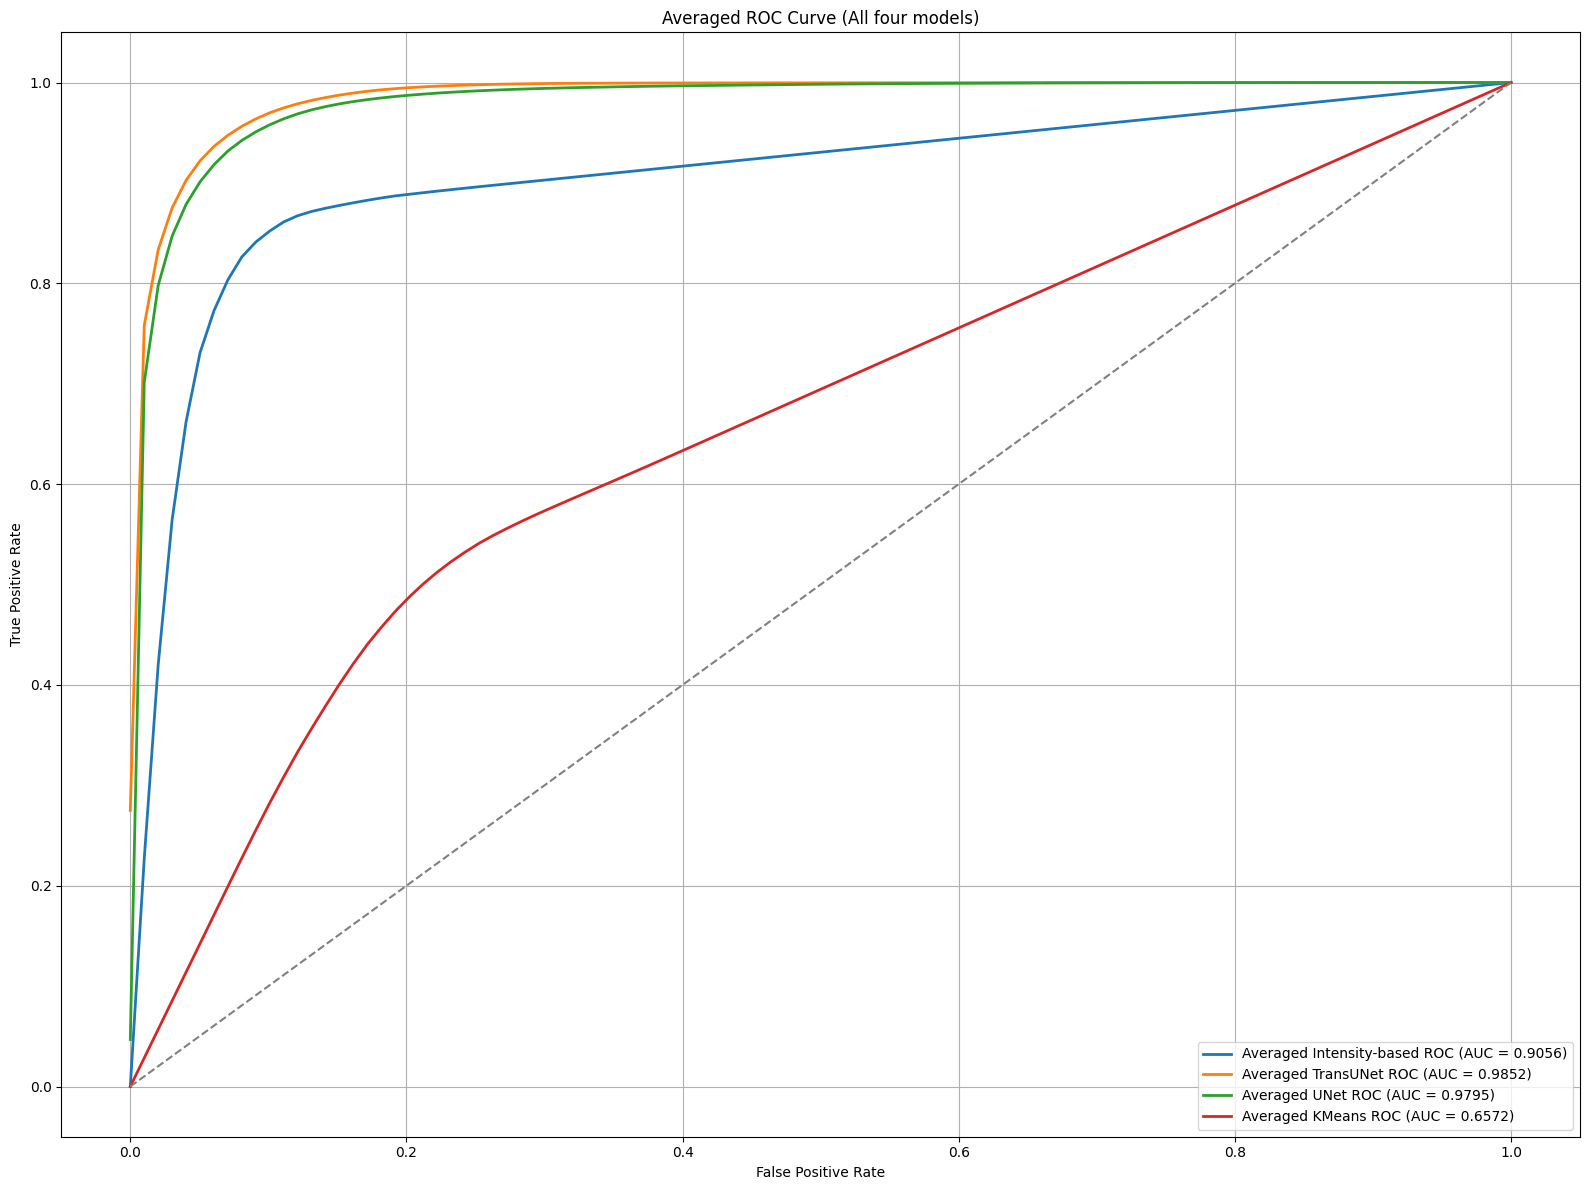

In [12]:

# Final report
y_true_flat = np.concatenate(all_y_true)
y_pred_flat = np.concatenate(all_y_pred)

print("\n=== Pixelwise Classification Report (Intensity Thresholding) ===")
print(classification_report(y_true_flat, y_pred_flat, labels=[0, 1, 2],
                            target_names=["Background", "Cytoplasm", "Nucleus"]))

# Compute average ROC
mean_fpr_inten = np.linspace(0, 1, 100)
mean_tpr_inten = np.zeros_like(mean_fpr_inten)
for fpr, tpr in zip(all_fpr, all_tpr):
    mean_tpr_inten += np.interp(mean_fpr_inten, fpr, tpr)
mean_tpr_inten /= len(all_fpr)
mean_roc_auc_inten = auc(mean_fpr_inten, mean_tpr_inten)

# Plot
plt.figure(figsize=(16, 12))
plt.plot(mean_fpr_inten, mean_tpr_inten, lw=2, label=f"Averaged Intensity-based ROC (AUC = {mean_roc_auc_inten:.4f})")
plt.plot(mean_fpr_tunet, mean_tpr_tunet, lw=2, label=f"Averaged TransUNet ROC (AUC = {mean_roc_auc_tunet:.4f})")
plt.plot(mean_fpr_unet, mean_tpr_unet, lw=2, label=f"Averaged UNet ROC (AUC = {mean_roc_auc_unet:.4f})")
plt.plot(mean_fpr_km, mean_tpr_km, lw=2, label=f"Averaged KMeans ROC (AUC = {mean_roc_auc_km:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Averaged ROC Curve (All four models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import segmentation_models_pytorch as smp
import torch

model9 = TransUNet(in_channels=3, classes=3)
model9.load_state_dict(torch.load("./seg_models/best_transunet_model_fold9.pkl", map_location="cpu"))

y_val_pred=make_predictions_transunet(X_input,model=model9, device="cuda" if torch.cuda.is_available() else "cpu")
y_val_pred_lbls=y_val_pred.argmax(1)
# Init lists to store computed areas for each specimen
nuclear_areas = []
cyto_areas = []
nc_ratios = []

# Loop over each image in the 
for i in range(len(y_val_pred_lbls)):
    # Get the label map for the current image
    image_labels = y_val_pred_lbls[i]  #  image i
    
    # Calculate nuclear and cytoplasmic areas 
    nuclear_area = (image_labels == 2).astype(np.uint8)
    cyto_area = (image_labels == 1).astype(np.uint8)

    # Compute the nuclear/cytoplasmic ratio
    nc_ratio = np.sum(nuclear_area) / (np.sum(cyto_area) + np.sum(nuclear_area)) if np.sum(cyto_area) + np.sum(nuclear_area) != 0 else 0

    # Store the results for each specimen
    nuclear_areas.append(np.sum(nuclear_area))
    cyto_areas.append(np.sum(cyto_area))
    nc_ratios.append(nc_ratio)

# Add the computed values as columns to the df
df["nc_ratio_pred"] = nc_ratios
df["nuclear_area_pred"] = nuclear_areas
df["cyto_area_pred"] = cyto_areas

# Display the df
df.head()




#for each fold generate masks for the specimen images
model9 = dict(unet=smp.Unet, fpn=smp.FPN).get("unet", smp.Unet)
model9 = model9(classes=3, in_channels=3, encoder_name="resnet18", encoder_weights=None)
model9.load_state_dict(torch.load(f"./seg_models/bestunet_model_fold9.pkl", map_location="cpu"))

y_val_pred=make_predictions_transunet(X_input,model=model9, device="cuda" if torch.cuda.is_available() else "cpu")
y_val_pred_lbls=y_val_pred.argmax(1)
# Init lists to store computed areas for each specimen
nuclear_areas = []
cyto_areas = []
nc_ratios = []

# Loop over each 
for i in range(len(y_val_pred_lbls)):
    # Get the label map for the current image
    image_labels = y_val_pred_lbls[i]  # image i
    
    # Calculate nuclear and cytoplasmic areas 
    nuclear_area = (image_labels == 2).astype(np.uint8)
    cyto_area = (image_labels == 1).astype(np.uint8)

    # Compute the nuclear/cytoplasmic ratio
    nc_ratio = np.sum(nuclear_area) / (np.sum(cyto_area) + np.sum(nuclear_area)) if np.sum(cyto_area) + np.sum(nuclear_area) != 0 else 0

    # Store the results for each specimen
    nuclear_areas.append(np.sum(nuclear_area))
    cyto_areas.append(np.sum(cyto_area))
    nc_ratios.append(nc_ratio)

# Add the values as columns to the df
df["nc_ratio_pred_u"] = nc_ratios
df["nuclear_area_pred_u"] = nuclear_areas
df["cyto_area_pred_u"] = cyto_areas

# Display the df
df.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\2535196637.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model9.load_state_dict(torch.load("./seg_models/best_transun

,aty,nc_ratio,nuclear_area,cyto_area,class_,nc_ratio_pred,nuclear_area_pred,cyto_area_pred,nc_ratio_pred_u,nuclear_area_pred_u,cyto_area_pred_u
0,0.057022,0.141928,7221.0,43657.0,neg,0.102152,6119,53782,0.117175,7180,54096
1,0.037513,0.175625,7597.0,35660.0,neg,0.076345,4524,54733,0.107722,6629,54909
2,0.056971,0.150782,7442.0,41914.0,neg,0.108678,6313,51776,0.000169,10,59300
3,0.077020,0.182437,8177.0,36644.0,neg,0.039568,2448,59420,0.122605,7659,54810
4,0.111039,0.183712,8696.0,38639.0,neg,0.169090,8815,43317,0.128551,6227,42213


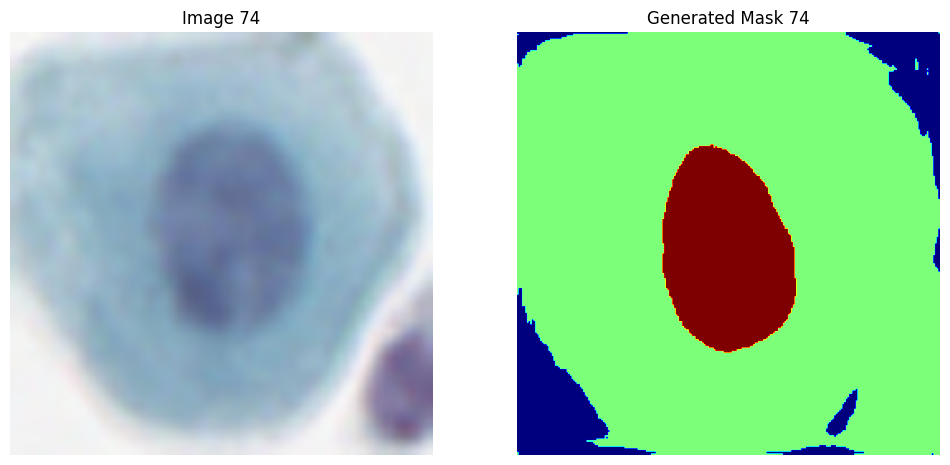

In [14]:
import matplotlib.pyplot as plt

# Choose the index 
index = 74  

# Get the image and the predicted mask for the chosen row
image = X_input[index].cpu().numpy().transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
mask = y_val_pred_lbls[index]  # the predicted label mask for the image

# Display the image and the mask side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax[0].imshow(image)
ax[0].set_title(f"Image {index}")
ax[0].axis('off')

# Display the generated mask
ax[1].imshow(mask, cmap='jet')  # Use a colormap to make the mask visible
ax[1].set_title(f"Generated Mask {index}")
ax[1].axis('off')

plt.show()


 TransUNet Logistic Regression Performance 
                              features  accuracy  precision    recall  \
0  (nc_ratio, nuclear_area, cyto_area)      0.96   1.000000  0.916667   
1            (nuclear_area, cyto_area)      0.96   1.000000  0.916667   
2                          (nc_ratio,)      0.92   0.916667  0.916667   
3                (nc_ratio, cyto_area)      0.92   0.916667  0.916667   
4                      (nuclear_area,)      0.92   0.916667  0.916667   
5             (nc_ratio, nuclear_area)      0.92   0.916667  0.916667   
6                         (cyto_area,)      0.68   0.750000  0.500000   

         f1  
0  0.956522  
1  0.956522  
2  0.916667  
3  0.916667  
4  0.916667  
5  0.916667  
6  0.600000  

 UNet Logistic Regression Performance 
                              features  accuracy  precision    recall  \
0                      (nuclear_area,)      0.80        1.0  0.583333   
1                (nc_ratio, cyto_area)      0.80        1.0  0.583333   


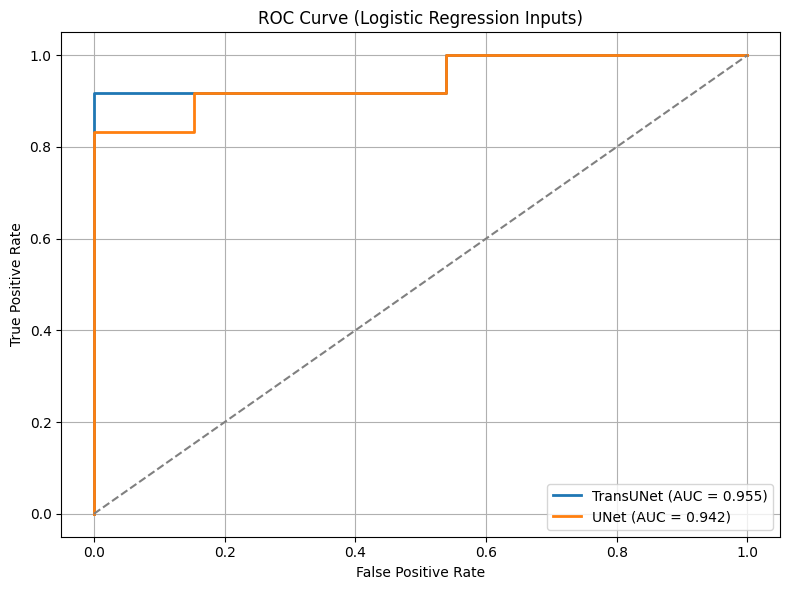

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

features = ["nc_ratio", "nuclear_area", "cyto_area"]
pred_trans = ["nc_ratio_pred", "nuclear_area_pred", "cyto_area_pred"]
pred_unet = ["nc_ratio_pred_u", "nuclear_area_pred_u", "cyto_area_pred_u"]

df["binary_class"] = df["class_"].apply(lambda x: 1 if x in ["pos", "sus"] else 0)

results_trans, results_unet = [], []
roc_data = {}

for r in range(1, len(features) + 1):
    for combo in combinations(features, r):
        idxs = [features.index(f) for f in combo]
        pred_cols_trans = [pred_trans[i] for i in idxs]
        pred_cols_unet = [pred_unet[i] for i in idxs]
        y = df["binary_class"].values

        #  TransUNet
        X_train, X_test, y_train, y_test = train_test_split(
            df[list(combo)].values, y, stratify=y, test_size=0.25, random_state=42)
        _, X_pred, _, y_pred_gt = train_test_split(
            df[pred_cols_trans].values, y, stratify=y, test_size=0.25, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_pred_scaled = scaler.transform(X_pred)

        model = LogisticRegression(class_weight="balanced", max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_pred_scaled)
        y_proba = model.predict_proba(X_pred_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_pred_gt, y_proba)

        auc_score = auc(fpr, tpr)
        roc_data["trans"] = (fpr, tpr, auc_score)

        report = classification_report(y_pred_gt, y_pred, output_dict=True)
        results_trans.append({
            "features": combo,
            "accuracy": report["accuracy"],
            "precision": report["1"]["precision"],
            "recall": report["1"]["recall"],
            "f1": report["1"]["f1-score"]
        })

        #  UNet
        _, X_pred_u, _, y_pred_gt = train_test_split(
            df[pred_cols_unet].values, y, stratify=y, test_size=0.25, random_state=42)
        X_pred_u_scaled = scaler.transform(X_pred_u)  # same scaler for fair comparison

        y_pred_u = model.predict(X_pred_u_scaled)
        y_proba_u = model.predict_proba(X_pred_u_scaled)[:, 1]
        fpr_u, tpr_u, _ = roc_curve(y_pred_gt, y_proba_u)

        auc_score_u = auc(fpr_u, tpr_u)
        roc_data["unet"] = (fpr_u, tpr_u, auc_score_u)

        report_u = classification_report(y_pred_gt, y_pred_u, output_dict=True)
        results_unet.append({
            "features": combo,
            "accuracy": report_u["accuracy"],
            "precision": report_u["1"]["precision"],
            "recall": report_u["1"]["recall"],
            "f1": report_u["1"]["f1-score"]
        })

# Convert to DataFrames
df_trans = pd.DataFrame(results_trans).sort_values(by="accuracy", ascending=False).reset_index(drop=True)
df_unet = pd.DataFrame(results_unet).sort_values(by="accuracy", ascending=False).reset_index(drop=True)

print(" TransUNet Logistic Regression Performance ")
print(df_trans)

print("\n UNet Logistic Regression Performance ")
print(df_unet)

# Plot ROC
plt.figure(figsize=(8, 6))
fpr_t, tpr_t, auc_t = roc_data["trans"]
fpr_u, tpr_u, auc_u = roc_data["unet"]

plt.plot(fpr_t, tpr_t, label=f"TransUNet (AUC = {auc_t:.3f})", lw=2)
plt.plot(fpr_u, tpr_u, label=f"UNet (AUC = {auc_u:.3f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression Inputs)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Chris\AppData\Local\Temp\ipykernel_3864\2368914438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['binary_class'], y=df['nuclear_area'], palette='coolwarm')
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Chris\AppData\Local

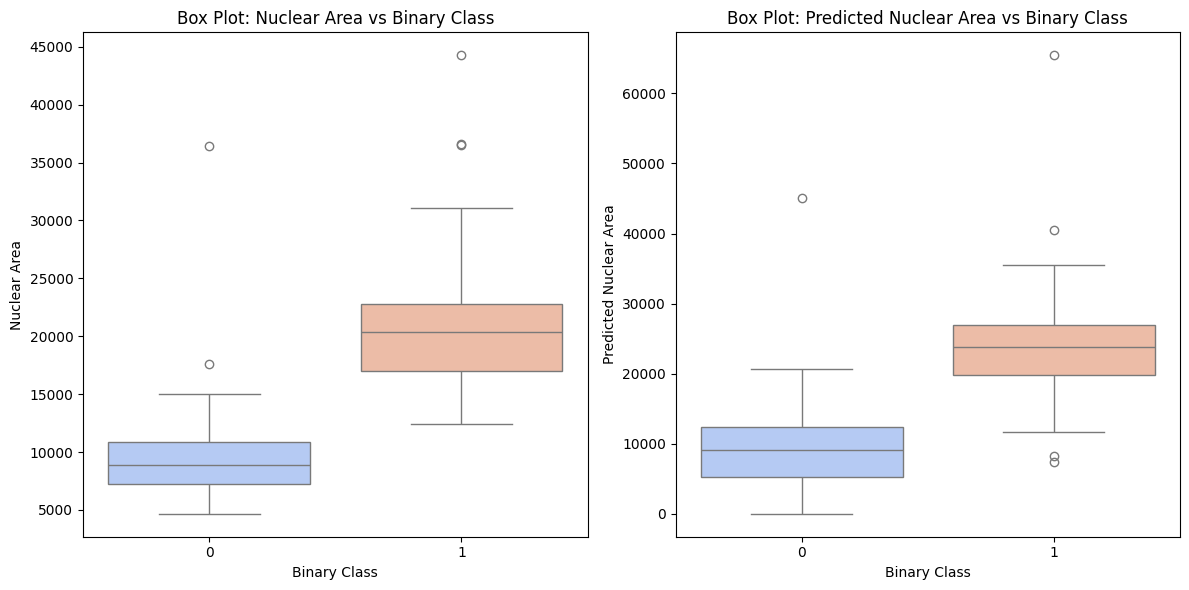

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a boxplot for 'nuclear_area' vs 'binary_class'
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, first plot)
sns.boxplot(x=df['binary_class'], y=df['nuclear_area'], palette='coolwarm')
plt.title('Box Plot: Nuclear Area vs Binary Class')
plt.xlabel('Binary Class')
plt.ylabel('Nuclear Area')

# Create a boxplot for 'nuclear_area_pred' vs 'binary_class'
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, second plot)
sns.boxplot(x=df['binary_class'], y=df['nuclear_area_pred'], palette='coolwarm')
plt.title('Box Plot: Predicted Nuclear Area vs Binary Class')
plt.xlabel('Binary Class')
plt.ylabel('Predicted Nuclear Area')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.metrics import classification_report

features = ["nc_ratio", "nuclear_area", "cyto_area"]
test_features = ["nc_ratio_pred", "nuclear_area_pred", "cyto_area_pred"]

# We will use the class_ column for ordinal regression
df["class_num"] = df["class_"].apply(lambda x: 0 if x == "neg" else (1 if x == "aty" else (2 if x == "sus" else 3)))

results=[]

# Loop over combinations of features for training
for r in range(1, len(features) + 1):
    for combo in combinations(features, r):

        # Map corresponding test features
        test_combo = [test_features[features.index(f)] for f in combo]

        # Select the features and labels
        X_spec = df[list(combo)].values
        y_spec = df["class_num"].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_spec, y_spec, stratify=y_spec, test_size=0.25, random_state=42)
        test_X = df[list(test_combo)].values
        _, X_test, _, _ = train_test_split(test_X, y_spec, stratify=y_spec, test_size=0.25, random_state=42)

        # Normalize the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Set up Logistic Regression for 
        model = LogisticRegression(class_weight="balanced", max_iter=1000, multi_class='ovr')  # One-vs-rest for multi-class
        model.fit(X_train_scaled, y_train)

        # Get predictions
        y_pred = model.predict(X_test_scaled)
        
        # Classification Report for performance evaluation
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = report["accuracy"]
        dice = report["1"]["f1-score"] if "1" in report else 0.0  # F1-score for class 1 (if it exists)

        # Store the results for each feature combination
        results.append({
            "features": combo,
            "accuracy": accuracy,
            "dice": dice,
        })

# Convert results to DataFrame and sort by accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="accuracy", ascending=False).reset_index(drop=True)

# Output the results
print(results_df)


                              features  accuracy      dice
0                          (nc_ratio,)      0.60  0.444444
1            (nuclear_area, cyto_area)      0.52  0.000000
2             (nc_ratio, nuclear_area)      0.52  0.000000
3  (nc_ratio, nuclear_area, cyto_area)      0.52  0.000000
4                (nc_ratio, cyto_area)      0.48  0.000000
5                      (nuclear_area,)      0.44  0.200000
6                         (cyto_area,)      0.40  0.000000


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

In [18]:
# Transpose to (N, 256, 256, 3)  RGB 
X_rgb = np.transpose(X, (0, 2, 3, 1)).astype(np.uint8)

# Set up K-Fold
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store per-fold NCratios
all_fold_results = []

all_y_true = []
all_y_pred = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_rgb)):
    X_val_fold = X_rgb[val_idx]
    Y_val_fold = Y[val_idx]

    nc_ratio_val_true = []
    nc_ratio_val_pred = []

    for img_rgb, label in zip(X_val_fold, Y_val_fold):
        img_gray = rgb2gray(img_rgb)
        pixels = img_rgb.reshape(-1, 3).astype(np.float32)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(pixels).reshape(img_gray.shape)

        cluster_means = [img_gray[labels == i].mean() for i in range(3)]
        cluster_order = np.argsort(cluster_means)

        nucleus_mask = labels == cluster_order[0]
        cytoplasm_mask = labels == cluster_order[1]
        background_mask = labels == cluster_order[2]

        label_map = np.zeros_like(labels, dtype=np.uint8)
        label_map[nucleus_mask] = 2
        label_map[cytoplasm_mask] = 1
        label_map[background_mask] = 0

        
        all_y_true.append(label.flatten())
        all_y_pred.append(label_map.flatten())
        

        nucleus_area = nucleus_mask.sum()
        cytoplasm_area = cytoplasm_mask.sum()
        nc_ratio_pred = nucleus_area / (nucleus_area + cytoplasm_area)

        nucleus_area_true = (label == 2).sum()
        cytoplasm_area_true = (label == 1).sum()
        nc_ratio_true = nucleus_area_true / (nucleus_area_true + cytoplasm_area_true)

        nc_ratio_val_true.append(nc_ratio_true)
        nc_ratio_val_pred.append(nc_ratio_pred)

    all_fold_results.append((nc_ratio_val_true, nc_ratio_val_pred))

# Flatten all folds
y_true_flat = np.concatenate(all_y_true)
y_pred_flat = np.concatenate(all_y_pred)

print("\n=== Pixelwise Classification Report ===")
print(classification_report(y_true_flat, y_pred_flat, labels=[0,1,2], target_names=["Background", "Cytoplasm", "Nucleus"]))


# Convert all_fold_results to a dataframe
results_dict = {
    f"Fold_{i}_True": true
    for i, (true, _) in enumerate(all_fold_results)
}
results_dict.update({
    f"Fold_{i}_Pred": pred
    for i, (_, pred) in enumerate(all_fold_results)
})

df = pd.DataFrame(results_dict)

# Print a sample of the results
print("RGB KMeans NC Ratio Results (first 5 rows):")
print(df.head())


ValueError: the input array must have size 3 along `channel_axis`, got (256, 3, 256)